In [2]:
#pip install matplotlib
#pip install ipywidgets

In [3]:
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

FileUpload(value=(), accept='image/*', description='Upload')

In [4]:
uploaded_images = uploader.value

if uploaded_images:
    # Get the first uploaded image
    uploaded_image = uploaded_images[0]
    
    # Get the binary content of the uploaded image
    image_content = uploaded_image['content']
    
    # Now you can process the image_content as a binary file
    # For example, you can save it to a file
    with open('uploaded_image.jpg', 'wb') as f:
        f.write(image_content)


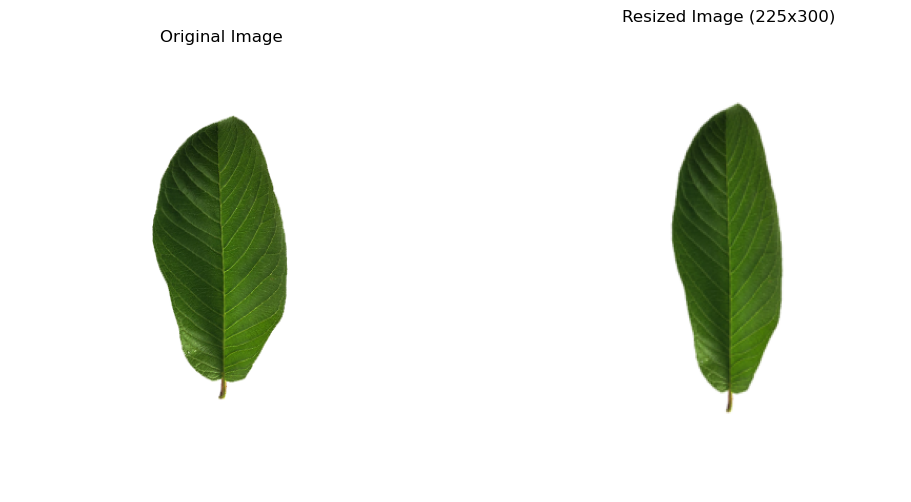

In [5]:
from PIL import Image
import io
import matplotlib.pyplot as plt

# Assuming 'image_content' contains the binary content of the uploaded image

# Convert binary content to a PIL Image object
original_pil_image = Image.open(io.BytesIO(image_content))

# Resize the image to 225x300 pixels
resized_pil_image = original_pil_image.resize((225, 300))

# Display the original and resized images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_pil_image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(resized_pil_image)
axes[1].set_title('Resized Image (225x300)')
axes[1].axis('off')
plt.show()


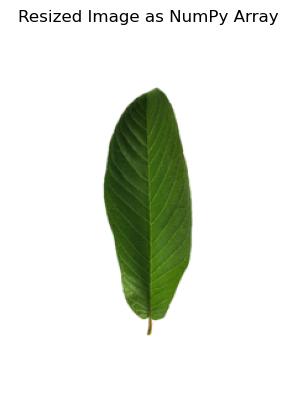

In [32]:
import numpy as np

# Convert the resized PIL image to a NumPy array
resized_np_array = np.array(resized_pil_image)

# Display the NumPy array as an image
plt.imshow(resized_np_array)
plt.title('Resized Image as NumPy Array')
plt.axis('off')
plt.show()


In [33]:
# Normalize the pixel values of the resized image
normalized_image = resized_np_array / 255.0  # Assuming the pixel values are in the range [0, 255]

# Expand the dimensions to make it suitable for feeding into a model
normalized_expanded_image = np.expand_dims(normalized_image, axis=0)

# Display the shape of the normalized and expanded image
print("Shape of normalized and expanded image:", normalized_expanded_image.shape)


Shape of normalized and expanded image: (1, 300, 225, 3)


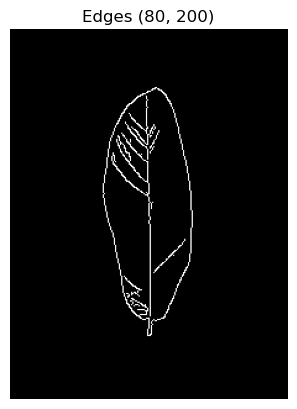

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Convert the resized PIL image to a NumPy array
resized_np_array = np.array(resized_pil_image)

threshold1_a = 100
threshold2_a = 200
threshold1_b = 80
threshold2_b = 200

# Apply Canny edge detection to the resized image with threshold values (100, 200)
edges_1 = cv2.Canny(resized_np_array, threshold1_a, threshold2_a)

# Display the original image, along with two sets of edges
# Apply Canny edge detection to the resized image with threshold values (80, 200)
edges_2 = cv2.Canny(resized_np_array, threshold1_b, threshold2_b)

# Display only edges_2
plt.imshow(edges_2, cmap='gray')
plt.title('Edges ({}, {})'.format(threshold1_b, threshold2_b))
plt.axis('off')
plt.show()


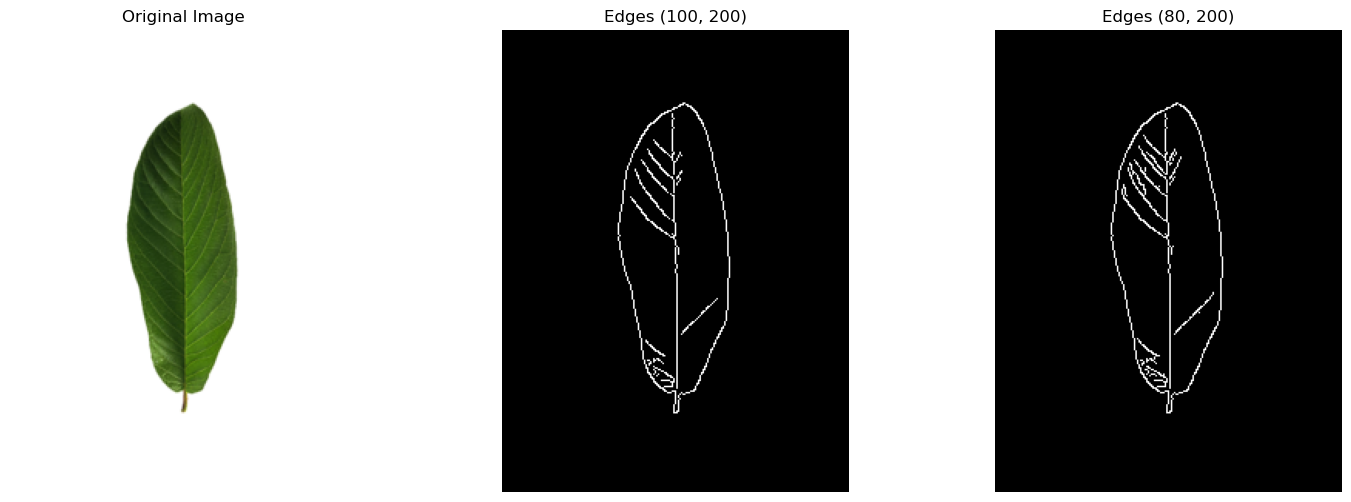

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original imge
axes[0].imshow(resized_np_array)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Edges with threshold values (100, 200)
axes[1].imshow(edges_1, cmap='gray')
axes[1].set_title('Edges ({}, {})'.format(threshold1_a, threshold2_a))
axes[1].axis('off')

# Edges with threshold values (80, 200)
axes[2].imshow(edges_2, cmap='gray')
axes[2].set_title('Edges ({}, {})'.format(threshold1_b, threshold2_b))
axes[2].axis('off')

plt.show()
